In [1]:
import sys
sys.path.append("..")

import Essentials

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
data_archive = np.load('../Data_First.npz', allow_pickle=True)

In [4]:
def prepare_Y(y):
    timestamp = y[:, 1]   
    y = y[:, 0].reshape(len(y), 1)
    y = y.astype(np.float64)

    return y, timestamp

In [5]:
all_X_1 = data_archive['all_X_1']
all_Y_1 = data_archive['all_Y_1']

all_X_2 = data_archive['all_X_2']
all_Y_2 = data_archive['all_Y_2']

all_X_3 = data_archive['all_X_3']
all_Y_3 = data_archive['all_Y_3']

x_summer_half_2 = data_archive['x_summer_half_2']
y_summer_half_2 = data_archive['y_summer_half_2']
x_winter_half_2 = data_archive['x_winter_half_2']
y_winter_half_2 = data_archive['y_winter_half_2']

x_summer_half_3 = data_archive['x_summer_half_3']
y_summer_half_3 = data_archive['y_summer_half_3']
x_winter_half_3 = data_archive['x_winter_half_3']
y_winter_half_3 = data_archive['y_winter_half_3']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(all_X_1, all_Y_1, test_size=0.3, random_state=42)

In [7]:
y_train, timestamp_train = prepare_Y(y_train)

In [8]:
y_test, timestamp_test = prepare_Y(y_test)

In [9]:
x_train_summer, x_test_summer, y_train_summer, y_test_summer = train_test_split(x_summer_half_2, y_summer_half_2, test_size=0.2, random_state=42)

In [10]:
x_train_winter, x_test_winter, y_train_winter, y_test_winter = train_test_split(x_winter_half_2, y_winter_half_2, test_size=0.2, random_state=42)

In [11]:
y_train_summer, timestamp_train_summer = prepare_Y(y_train_summer)

In [12]:
y_train_winter, timestamp_train_winter = prepare_Y(y_train_winter)

In [13]:
y_test_summer, timestamp_test_summer = prepare_Y(y_test_summer)

In [14]:
y_test_winter, timestamp_test_winter = prepare_Y(y_test_winter)

In [15]:
x_train.shape

(90, 96)

In [16]:
class LR(Essentials.SoftSensor):
    def __init__(self, name, x_train, y_train):
        super().__init__(name)
        self.model = LinearRegression()
        self.train(x_train, y_train)
        self.set_model(self.model)

    def preprocessing(self, x):
        return x
    
    def postprocessing(self, x):
        return x

    def evaluate_model(self, x):
        predictions = self.get_model().predict(x)
        return predictions

    def train(self, x_train, y_train):
        self.model.fit(x_train,y_train)

    def __str__(self):
        return  f"Коэффициенты линейной регрссии = {self.get_model().coef_.reshape(-1,1)}, Свободный член = {self.get_model().intercept_.reshape(-1, 1)}"

In [17]:
LR_test = LR("LR", x_train, y_train)

In [18]:
metric = Essentials.R2Metric()

In [19]:
print(LR_test)

Коэффициенты линейной регрссии = [[-4.05962786e-01]
 [ 1.16413137e-01]
 [-2.10139298e-01]
 [-2.32974863e-01]
 [-1.42985810e+00]
 [-3.42019287e+01]
 [ 2.27651973e-01]
 [ 1.55860414e+00]
 [ 4.11826080e+00]
 [-1.49697184e+00]
 [ 1.55860415e+00]
 [ 1.64143141e+02]
 [ 2.02713633e+01]
 [ 1.60242984e+00]
 [-1.13529061e+02]
 [-2.61341229e+00]
 [-3.34050522e+00]
 [ 1.64284409e+01]
 [ 5.06408723e+00]
 [ 2.70261447e-01]
 [ 4.61992347e-01]
 [-1.92087394e+02]
 [-2.27824897e+01]
 [-1.64509310e+01]
 [-1.39252050e+00]
 [ 1.09183797e+02]
 [ 9.94532150e-02]
 [ 8.76112581e-02]
 [-1.91187880e+00]
 [-7.14966263e-01]
 [-2.26711780e+01]
 [ 1.97675820e-01]
 [-1.65271994e+00]
 [ 9.40354617e-02]
 [ 1.22607010e+01]
 [ 1.08414495e+02]
 [-8.66967994e-02]
 [-1.76592222e+02]
 [ 1.37967831e+00]
 [ 7.39700875e-02]
 [-2.96597179e-01]
 [ 7.22703042e-02]
 [-1.27457175e+00]
 [ 8.36526097e+00]
 [-5.15695591e+00]
 [ 1.60242984e+00]
 [-1.70055923e+00]
 [-2.25025898e-02]
 [ 6.96402209e+01]
 [-3.32950468e+02]
 [-2.67476606e+00

In [20]:
LR_test.test(x_test, y_test, metric)

(array([[  32.99441447],
        [  56.70528296],
        [  45.64448813],
        [  49.68317781],
        [  63.61013604],
        [  54.458664  ],
        [  59.92130945],
        [  52.27598115],
        [  58.42952227],
        [  61.01320569],
        [  54.06859507],
        [  59.81464068],
        [  56.30103308],
        [  59.54757478],
        [  48.58570653],
        [  47.16008572],
        [  58.03090614],
        [  63.03559025],
        [  57.65233495],
        [  53.70600689],
        [  58.92703362],
        [  49.6802146 ],
        [  67.96665054],
        [  50.36578845],
        [  61.47136305],
        [  66.0942213 ],
        [-107.4736866 ],
        [  59.69602903],
        [  57.1329976 ],
        [  54.12362531],
        [  54.0858856 ],
        [  60.22302705],
        [  71.48904475],
        [  52.97832193],
        [  58.08361458],
        [  65.28256774],
        [  59.80465636],
        [  57.74446574],
        [  47.79296821]]),
 -59.20084041756272)

In [21]:
LR_test_visual_train = Essentials.Visualizer(x_train, y_train, timestamp_train, [metric], 'LR SoftSensor R2 metric on Train')

    Coefficient of determination
LR                           1.0


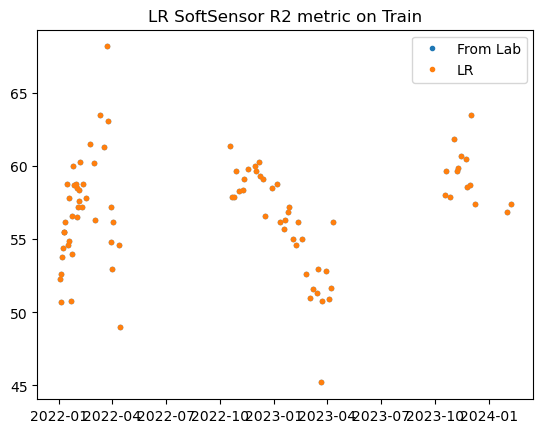

In [22]:
LR_test_visual_train.visualize([LR_test])

In [23]:
LR_test_visual_test = Essentials.Visualizer(x_test, y_test, timestamp_test, [metric], 'LR SoftSensor R2 metric on Test')

    Coefficient of determination
LR                     -59.20084


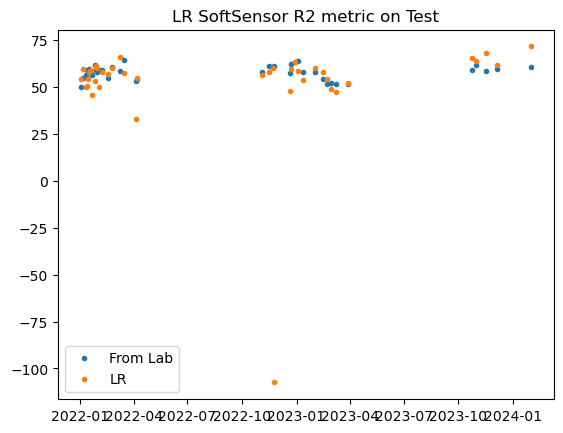

In [24]:
LR_test_visual_test.visualize([LR_test])